# 2 variables and 2 level 

In this part, we choose two design variables which are the micro-structure and the yield criterion and each of them do have two levels. 
- **Design variables** \
(1) micro-structure \
&nbsp; (a)$v_{frac} = 0.45$,  $L=0.048$ , $R_{mu}=0.01$, $R_{std}=0.003$ \
&nbsp; (b)$v_{frac} = 0.15$,  $L=0.048$ , $R_{mu}=0.0012$, $R_{std}=0.00002$ \
(2) hardening law \
&nbsp;  (a) $\sigma_{y} = 0.5+0.5\bar\epsilon$ \
&nbsp;  (b) $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$       


In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 
# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.coopative_learning_case import CooperativeRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler
from rvesimulator.microstructures.heter_radius_circles import HeterCircleInclusion

## Visualize the design variable information 

Time of generate the 2D RVE with volume fraction            = 0.45  is 0.19 s


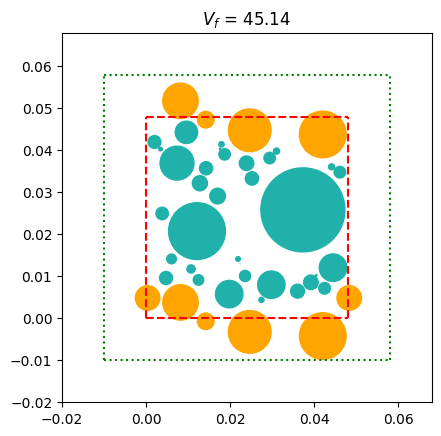

In [2]:
# visualize the micro-structure  
CircleInclusionGenerator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.01,
    radius_std=0.005,
    vol_req=0.45,
    seed=4, 
)
CircleInclusionGenerator.generate_rve()
CircleInclusionGenerator.plot_rve(save_figure=False)

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.02 s


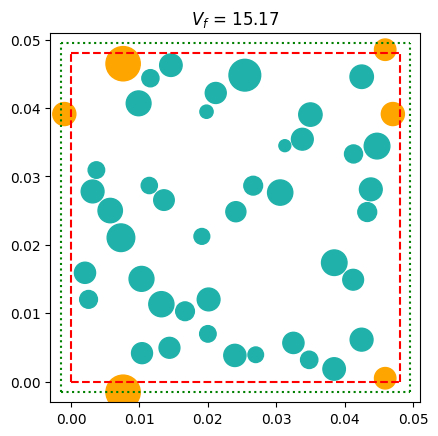

In [3]:
# visualize the micro-structure  
CircleInclusionGenerator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.0015,
    radius_std=0.0003,
    vol_req=0.15,
    seed=17, 
)
CircleInclusionGenerator.generate_rve()
CircleInclusionGenerator.plot_rve(save_figure=False)

[]

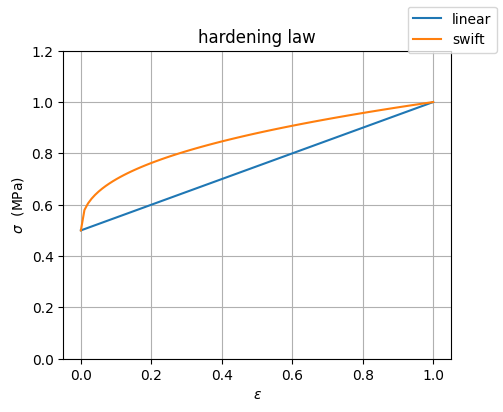

In [4]:
# yield criterion 1 
x_plot = np.linspace(0,1,100) 
y_plot_linear =0.5 + 0.5 * x_plot 
y_plot_swift = 0.5 + 0.5*(x_plot)**0.4

fig, ax = plt.subplots(figsize=(5,4)) 
ax.plot(x_plot, y_plot_linear, label='linear')
ax.plot(x_plot, y_plot_swift, label='swift') 
fig.legend() 
plt.grid()
plt.ylim([0,1.2])
plt.title('hardening law') 
plt.xlabel(r'$\epsilon$') 
plt.ylabel(r'$\sigma$  (MPa)')
plt.plot()

## set up the simulation 

In [5]:
# create the doe
# define the design space
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=12,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          7.0          100.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


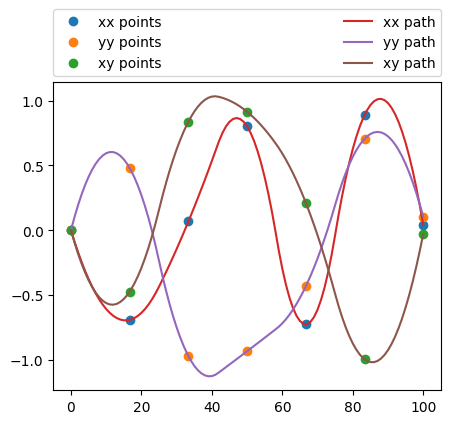

In [6]:
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=12, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0)

## Task 1 
- $v_{frac} = 0.45$
- $L=0.048$ 
- $R_{mu}=0.01$
- $R_{std}=0.003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law :  linear $\sigma_{y} = 0.5+0.5\bar\epsilon$
- fiber property \
(1) $E=1{MPa}$\
(2) $v=0.19$ 



In [7]:
simulation_wrapper = CooperativeRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.45, 
                                    radius_mu=0.01,
                                    radius_std=0.005, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='linear', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    num_cpu=6,
                                    seed=4,
                                    print_info=True) 


Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.01, 'radius_std': 0.005, 'seed': 4}
vol_req is: 0.45
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.5700000000000001, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.6799999999999999, 0.685, 0.69, 0.6950000000000001, 0.7, 0.7050000000000001, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.7949999999999999, 0.8, 0.8049999999999999, 0.81, 0.815, 0.8200000000000001, 0.825, 0.8300000000000001, 0.835, 0.8400000000000001, 0.845, 0.8500000000000001, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.45  is 0.20 s


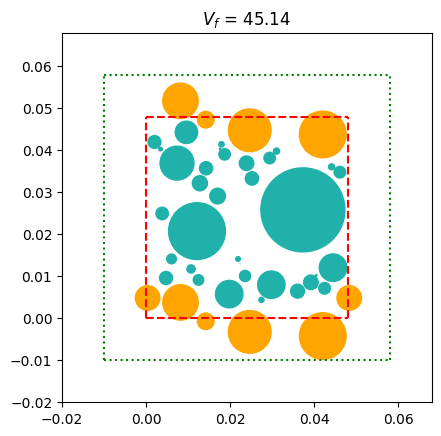

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/2_2_4experiments/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<20 out of 30 licenses remain available>.


simulation time :40.009356 s
simulation time :60.018833 s
simulation time :80.017467 s
simulation time :100.017545 s
simulation time :120.017560 s
simulation time :140.017612 s
simulation time :160.017629 s
simulation time :180.017592 s
simulation time :200.017837 s
simulation time :220.018980 s
simulation time :240.018125 s
simulation time :260.018281 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 280.0898995399475
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


In [8]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_1.pickle') 

## Task 2

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.0015$
- $R_{std}=0.0003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law: $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$
- fiber property\
(1) $E=1{MPa}$\
(2) $v=0.19$ 


In [9]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.15, 
                                    radius_mu=0.0015,
                                    radius_std=0.0003, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=True) 


Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.0015, 'radius_std': 0.0003, 'seed': 17}
vol_req is: 0.15
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5792446596230557, 0.6045639552591273, 0.6229754742924681, 0.6379729661461215, 0.6508544084136291, 0.6622671111599604, 0.6725874532990042, 0.682056420302608, 0.6908389454809087, 0.6990535852767487, 0.7067888311395025, 0.7141127368338324, 0.7210789255640928, 0.7277305099281833, 0.7341027460023103, 0.7402248867962862, 0.7461215111265916, 0.7518134982456163, 0.7573187569288689, 0.7626527804403767, 0.7678290755153834, 0.7728594985480539, 0.7777545223286737, 0.7825234500494767, 0.7871745887492587, 0.7917153911869923, 0.796152572875223, 0.8004922093745831, 0.8047398177595422, 0.808900425283706, 0.8129786276126214, 0.8169786384922226, 0.82

remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.01 s


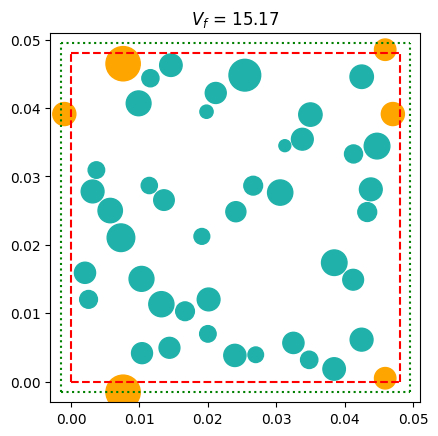

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/2_2_4experiments/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


Abaqus Error: cae exited with an error.
simulation time :40.009890 s
simulation time :60.017998 s
simulation time :80.018117 s
simulation time :100.018054 s
simulation time :120.018287 s
simulation time :140.019137 s
simulation time :160.018129 s
simulation time :180.020049 s
simulation time :200.018334 s
simulation time :220.021086 s
simulation time :240.020705 s
simulation time :260.018285 s
simulation time :280.020836 s
simulation time :300.019378 s
simulation time :320.018886 s
simulation time :340.018744 s
simulation time :360.018809 s
simulation time :380.019148 s
simulation time :400.019124 s
simulation time :420.018896 s
simulation time :440.019748 s
simulation time :460.019771 s
simulation time :480.019946 s
simulation time :500.019536 s
simulation time :520.019105 s
simulation time :540.019204 s
simulation time :560.019212 s
simulation time :580.019191 s
simulation time :600.018881 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Termi

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<21 out of 30 licenses remain available>.


In [10]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_2.pickle')

## Task 3

- $v_{frac} = 0.45$
- $L=0.048$ 
- $R_{mu}=0.01$
- $R_{std}=0.005$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law: $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$
- fiber property \  
(1) $E=1{MPa}$\
(2) $v=0.19$ 

In [11]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.45, 
                                    radius_mu=0.01,
                                    radius_std=0.005, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=4,
                                    print_info=True) 


Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.01, 'radius_std': 0.005, 'seed': 4}
vol_req is: 0.45
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5792446596230557, 0.6045639552591273, 0.6229754742924681, 0.6379729661461215, 0.6508544084136291, 0.6622671111599604, 0.6725874532990042, 0.682056420302608, 0.6908389454809087, 0.6990535852767487, 0.7067888311395025, 0.7141127368338324, 0.7210789255640928, 0.7277305099281833, 0.7341027460023103, 0.7402248867962862, 0.7461215111265916, 0.7518134982456163, 0.7573187569288689, 0.7626527804403767, 0.7678290755153834, 0.7728594985480539, 0.7777545223286737, 0.7825234500494767, 0.7871745887492587, 0.7917153911869923, 0.796152572875223, 0.8004922093745831, 0.8047398177595422, 0.808900425283706, 0.8129786276126214, 0.8169786384922226, 0.820904

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.45  is 0.24 s


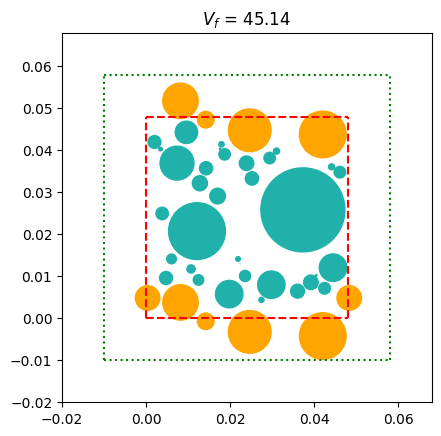

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/2_2_4experiments/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<20 out of 30 licenses remain available>.


simulation time :40.007072 s
simulation time :60.019784 s
simulation time :80.019261 s
simulation time :100.020452 s
simulation time :120.020715 s
simulation time :140.019356 s
simulation time :160.019360 s
simulation time :180.019410 s
simulation time :200.019471 s
simulation time :220.019413 s
simulation time :240.019753 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 260.09764337539673
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<20 out of 30 licenses remain available>.


In [13]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_3.pickle')

## Task 4

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.0015$
- $R_{std}=0.0003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law: linear $\sigma_{y} = 0.5+0.5(\bar\epsilon)$
- fiber property \  
(1) $E=1{MPa}$\
(2) $v=0.19$ 

In [14]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.15, 
                                    radius_mu=0.0015,
                                    radius_std=0.0003, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='linear', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=True) 

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.0015, 'radius_std': 0.0003, 'seed': 17}
vol_req is: 0.15
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.5700000000000001, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.6799999999999999, 0.685, 0.69, 0.6950000000000001, 0.7, 0.7050000000000001, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.7949999999999999, 0.8, 0.8049999999999999, 0.81, 0.815, 0.8200000000000001, 0.825, 0.8300000000000001, 0.835, 0.8400000000000001, 0.845, 0.8500000000000001, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0

remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.02 s


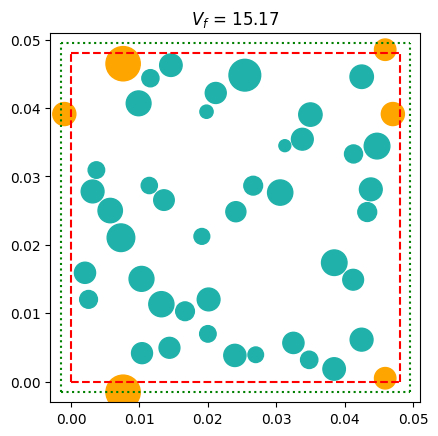

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/2_2_4experiments/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<20 out of 30 licenses remain available>.


simulation time :40.007869 s
simulation time :60.004052 s
simulation time :80.019922 s
simulation time :100.019961 s
simulation time :120.020060 s
simulation time :140.020061 s
simulation time :160.020085 s
simulation time :180.020382 s
simulation time :200.020164 s
simulation time :220.020227 s
simulation time :240.020259 s
simulation time :260.020792 s
simulation time :280.020329 s
simulation time :300.021052 s
simulation time :320.020478 s
simulation time :340.020461 s
simulation time :360.020967 s
simulation time :380.020615 s
simulation time :400.020719 s
simulation time :420.020739 s
simulation time :440.020746 s
simulation time :460.020969 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 480.07227325439453
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


In [15]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_4.pickle')

# plot all results together 

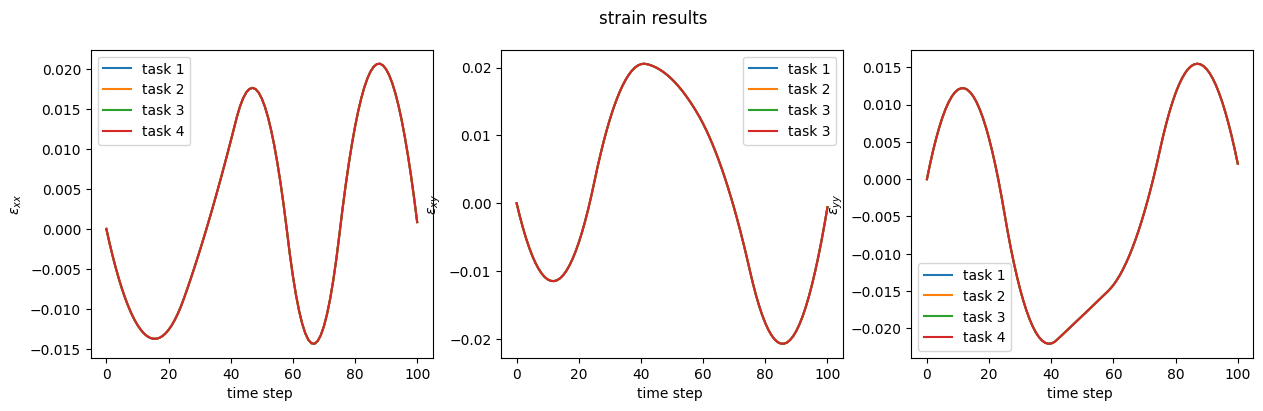

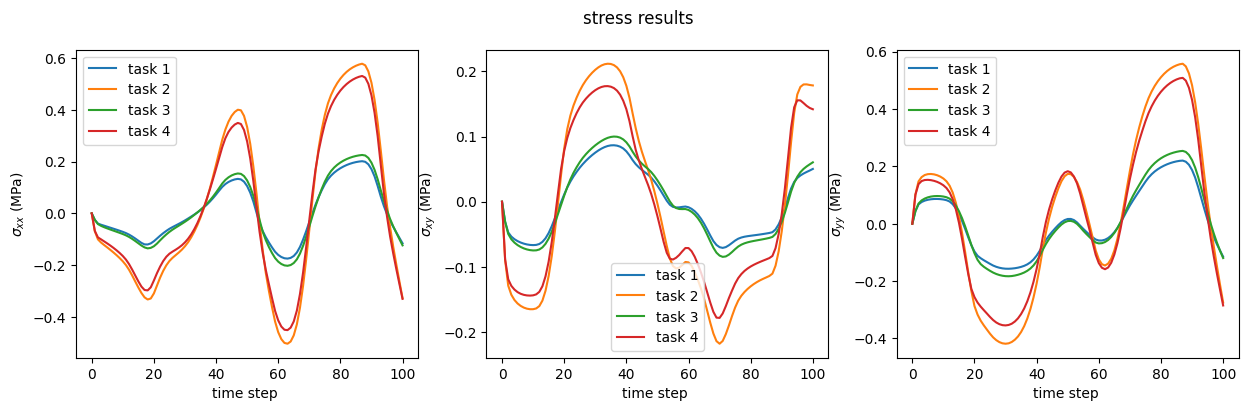

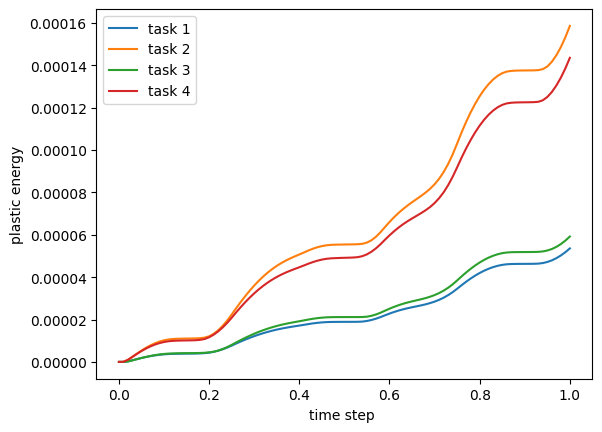

In [17]:
# os.chdir('Data/')
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
ax[1].plot(strain_4[:, 0, 1], label="task 3")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
ax[2].plot(strain_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
ax[1].plot(stress_4[:, 1, 0], label="task 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
ax[2].plot(stress_4[:, 1, 1], label="task 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)